In [1]:
# Linear Regression in R
## Ramya Prabhakar

In [2]:
install.packages("ggplot2")
library(ggplot2)

Installing package into 'C:/Users/pingr/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pingr\AppData\Local\Temp\RtmpY1kY4l\downloaded_packages


In [4]:
# use the diamonds dataset that is available with the ggplot package
# convert the dataset into a dataframe and print the first six rows of the data frame
diamonds <- as.data.frame(diamonds)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [5]:
# create a new column called surfaceArea and calculate that as the product of the columns x and y, which represent the 
# length and width of a diamond
diamonds$surfaceArea <- diamonds$x * diamonds$y


In [7]:
# run a linear regression of the dependent variable price vs the independent variable surface area using the lm function
lmMod <- lm(price ~ surfaceArea,data = diamonds)
summary(lmMod)


Call:
lm(formula = price ~ surfaceArea, data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-109568   -1015     -98     728   23189 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5154.7238    20.2426  -254.6   <2e-16 ***
surfaceArea   266.3851     0.5518   482.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1729 on 53938 degrees of freedom
Multiple R-squared:  0.8121,	Adjusted R-squared:  0.8121 
F-statistic: 2.331e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


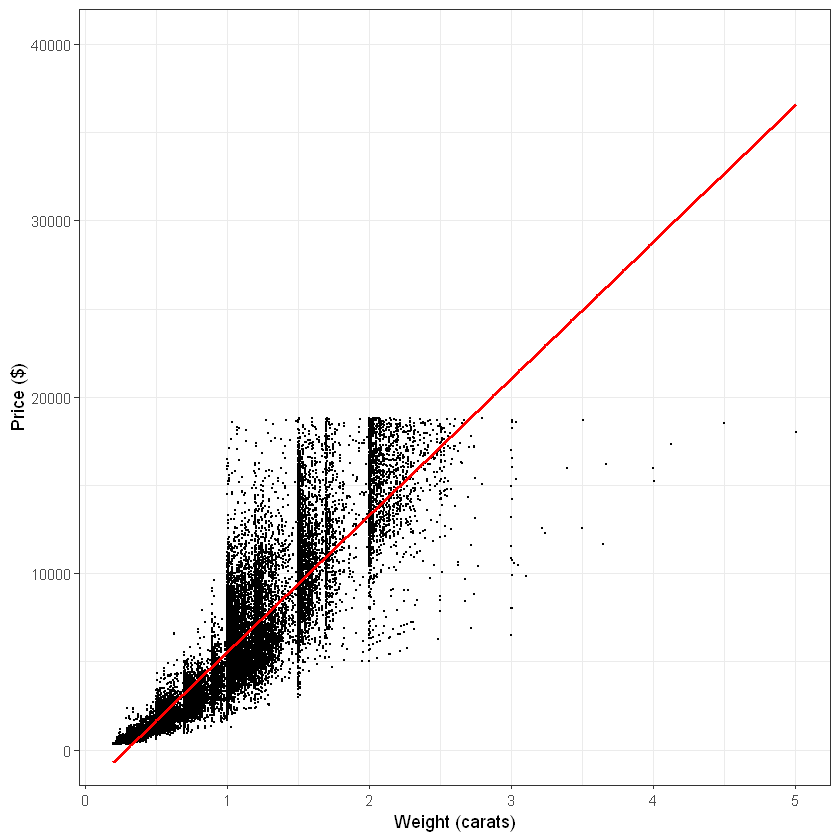

In [8]:
# create a scatter plot to understand how the data is ditributed

ggplot(data=diamonds,aes(x=carat, y = price))+
# add scatter plot
	geom_point(size=.1)+
# add trendline, change the color of the trendline to red, default is blue
	geom_smooth(method=lm, color = "red")+
	xlab("Weight (carats)")+
	ylab("Price ($)")+
	coord_cartesian(ylim=c(0,40000))+
	theme_bw()


In [10]:
# Predict the Price of a 0.2 carat diamond
# price = alpha + beta (carat) * carat
price = -2256.36 + 7756.43*0.2
price = -705.074
print('Predicted price of a 0.2 carat diamond is')
print (price)

[1] "Predicted price of a 0.2 carat diamond is"
[1] -705.074


In [11]:
# The prediction yields a negative price. This is not possible in the real world.
# It occurs since the scatter plot shows that the data distribution is not really linear.
# It's more logarithmic. This is systematically biased towards the very low weight and high weight diamonds.
# The medium weight ones work fine as they seem to be linear

,carat,cut,color,clarity,depth,table,price,x,y,z,surfaceArea
15,0.2,Premium,E,SI2,60.2,62,345,3.79,3.75,2.27,14.2125
31592,0.2,Premium,E,VS2,59.8,62,367,3.79,3.77,2.26,14.2883
31593,0.2,Premium,E,VS2,59.0,60,367,3.81,3.78,2.24,14.4018
31594,0.2,Premium,E,VS2,61.1,59,367,3.81,3.78,2.32,14.4018
31595,0.2,Premium,E,VS2,59.7,62,367,3.84,3.80,2.28,14.5920
31596,0.2,Ideal,E,VS2,59.7,55,367,3.86,3.84,2.30,14.8224
31597,0.2,Premium,F,VS2,62.6,59,367,3.73,3.71,2.33,13.8383
31598,0.2,Ideal,D,VS2,61.5,57,367,3.81,3.77,2.33,14.3637
31599,0.2,Very Good,E,VS2,63.4,59,367,3.74,3.71,2.36,13.8754
31600,0.2,Ideal,E,VS2,62.2,57,367,3.76,3.73,2.33,14.0248


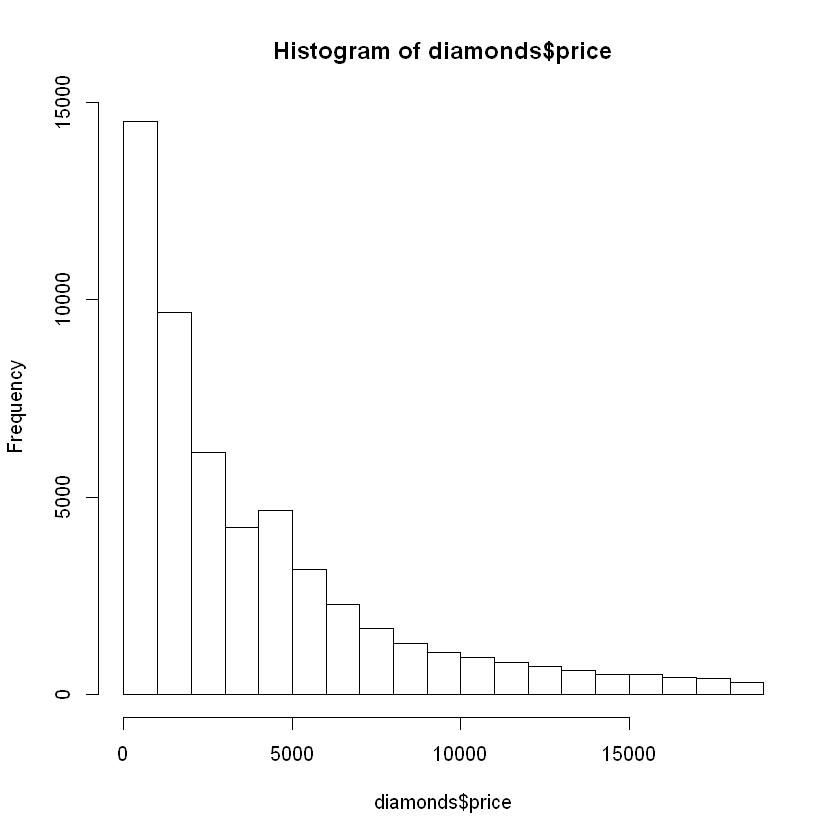

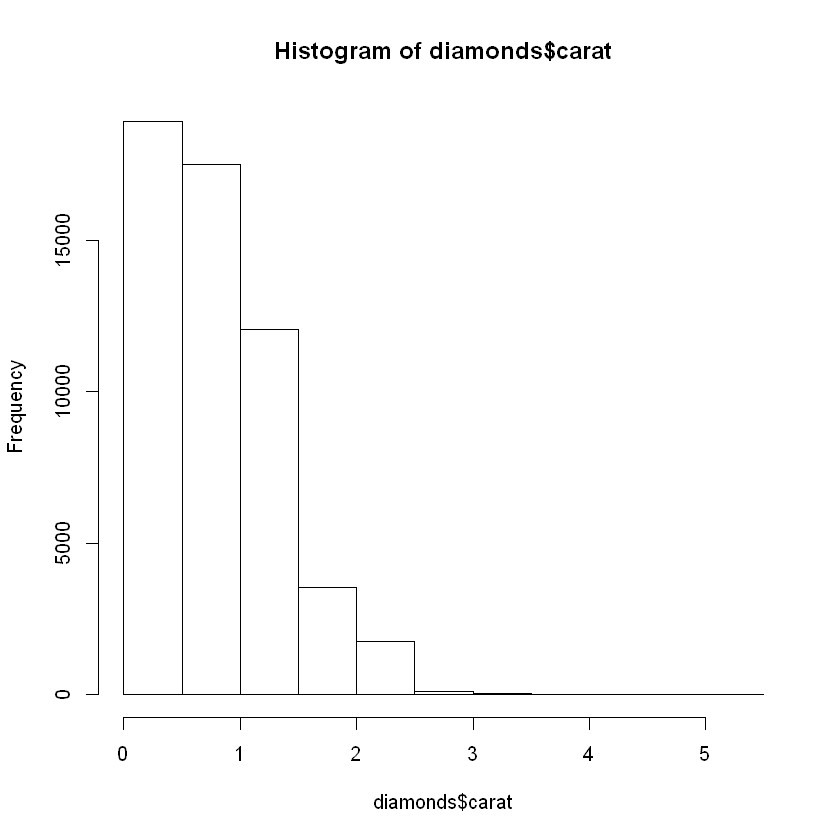

In [12]:
#consider just the 0.2 carat diamonds
subset(diamonds, carat == 0.2)

#plot the distributions of price and carat
hist(diamonds$price)
hist(diamonds$carat)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


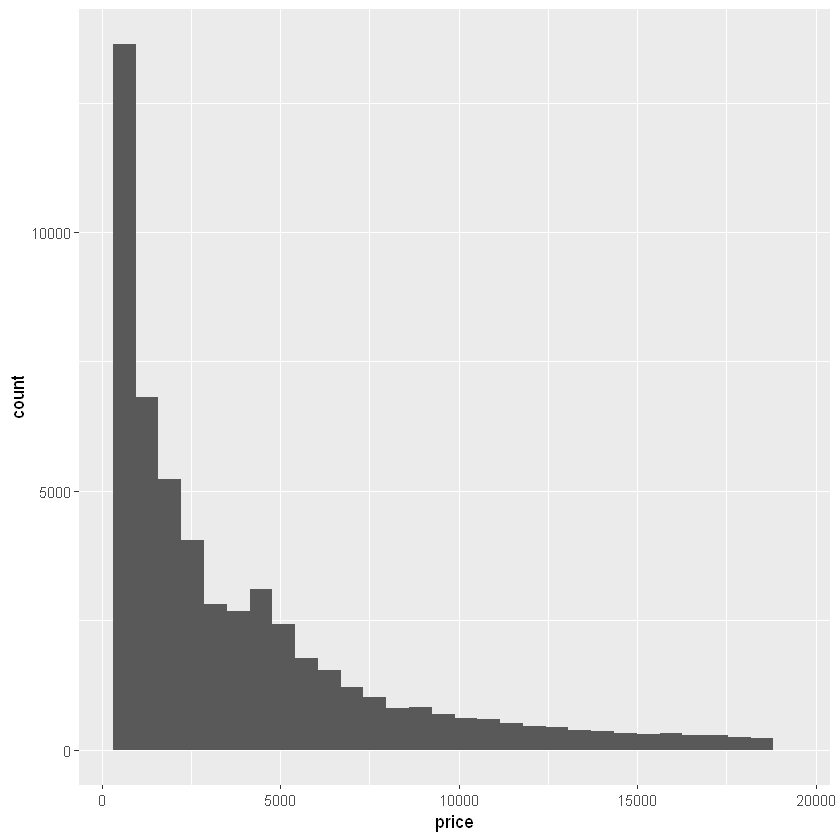

In [13]:
#create a histogram 
ggplot(data = diamonds, aes(x=price))+
geom_histogram()
#this histogram is right skewed


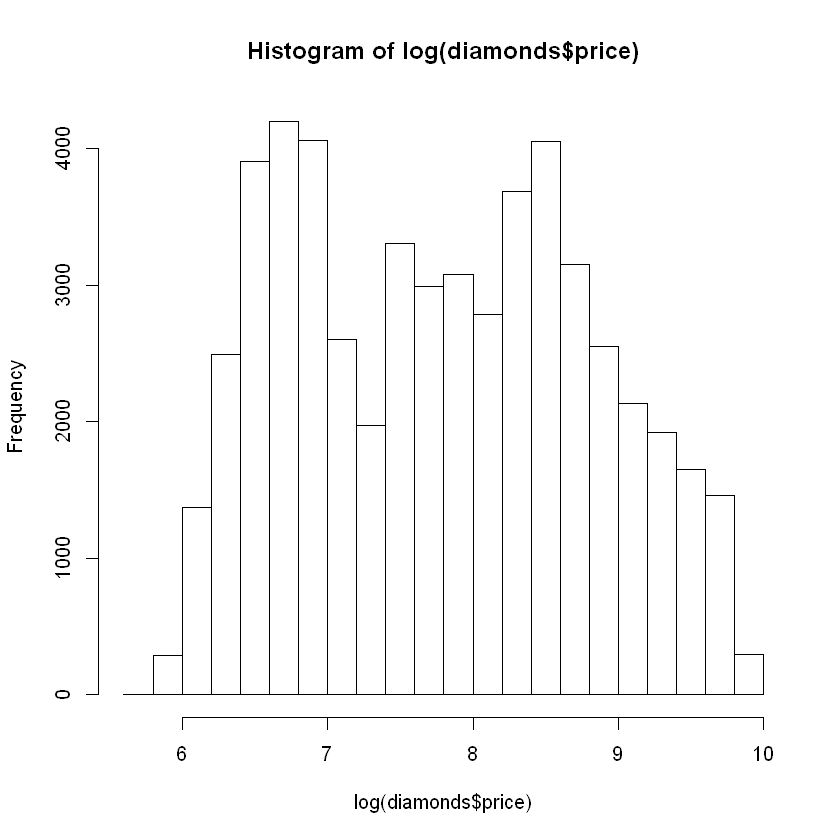

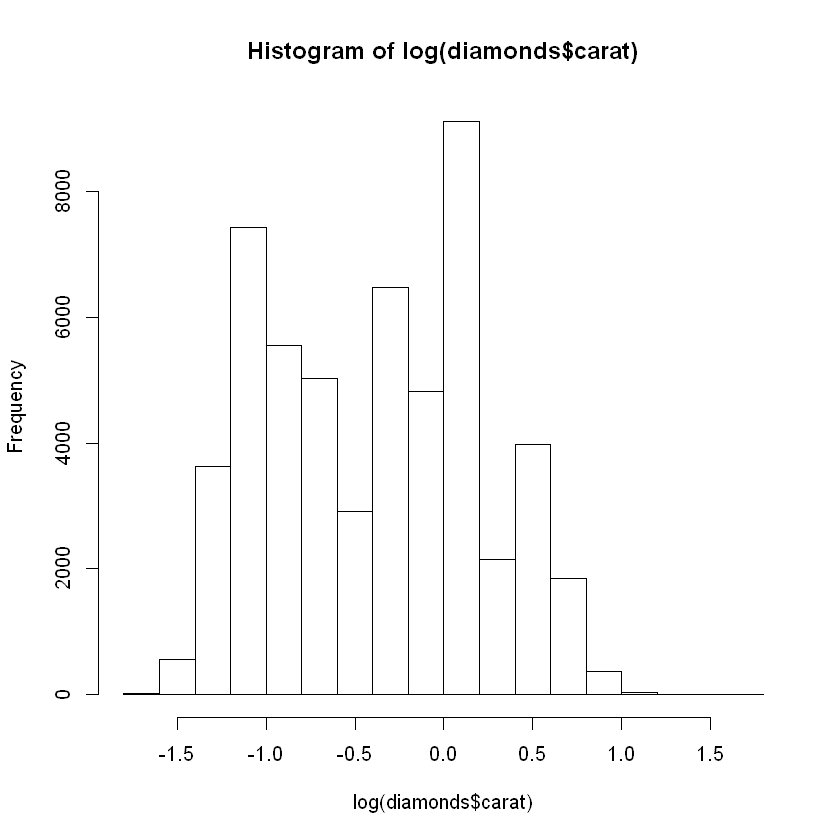

In [14]:
# regressions often do best with normally distributed data that follow the bell curve or gaussian distribution
# log values seem to follow a normal distribution

hist(log(diamonds$price))
hist(log(diamonds$carat))



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


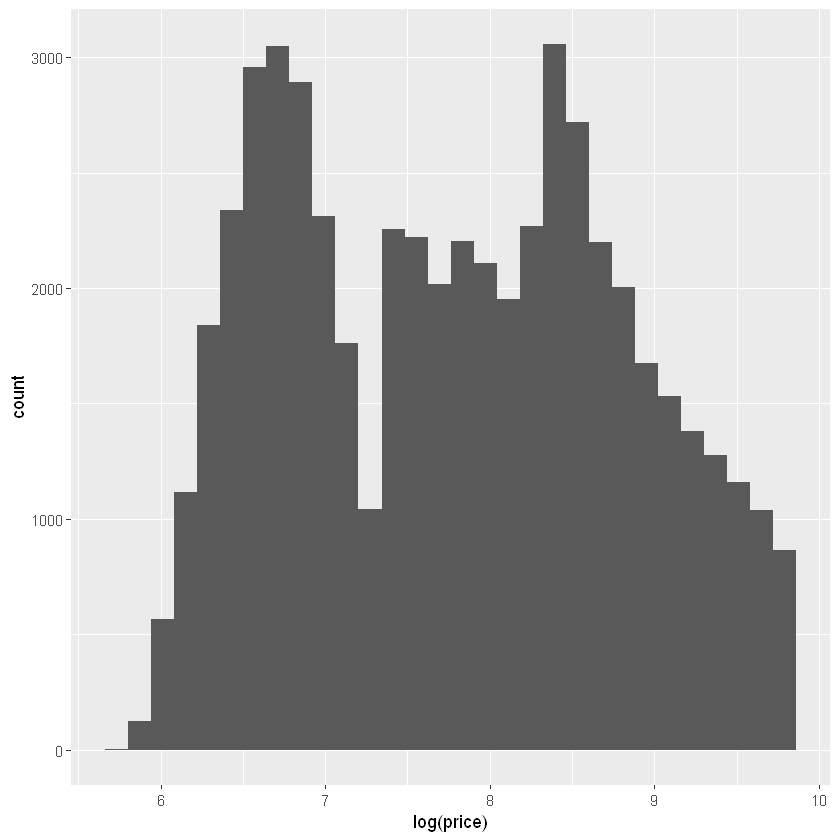

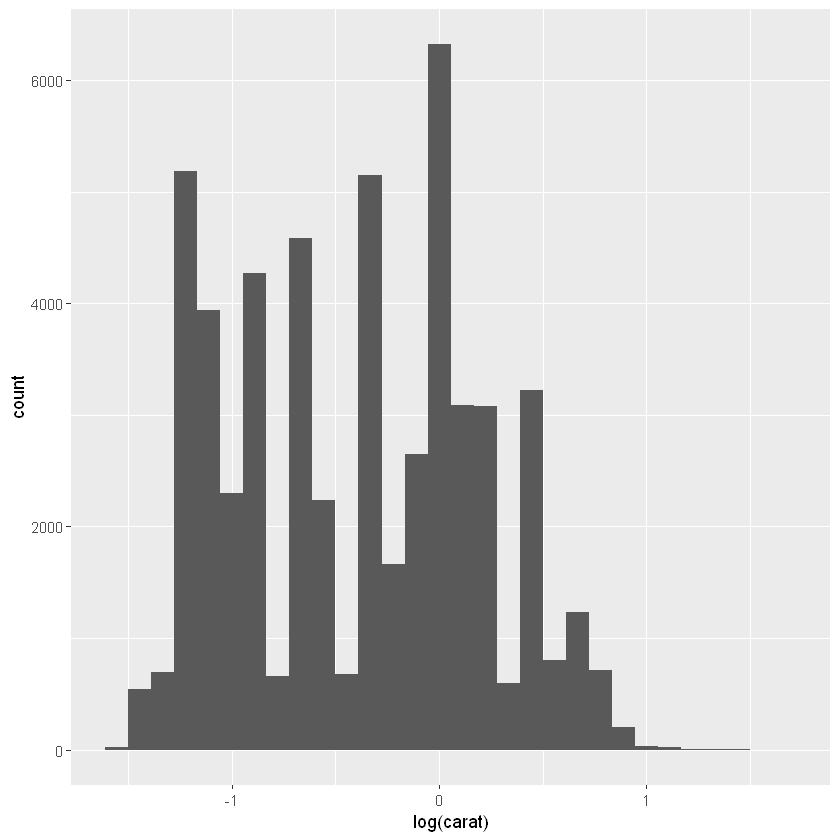

In [15]:
ggplot(data = diamonds, aes(x=log(price)))+
geom_histogram()

ggplot(data = diamonds, aes(x=log(carat)))+
geom_histogram()


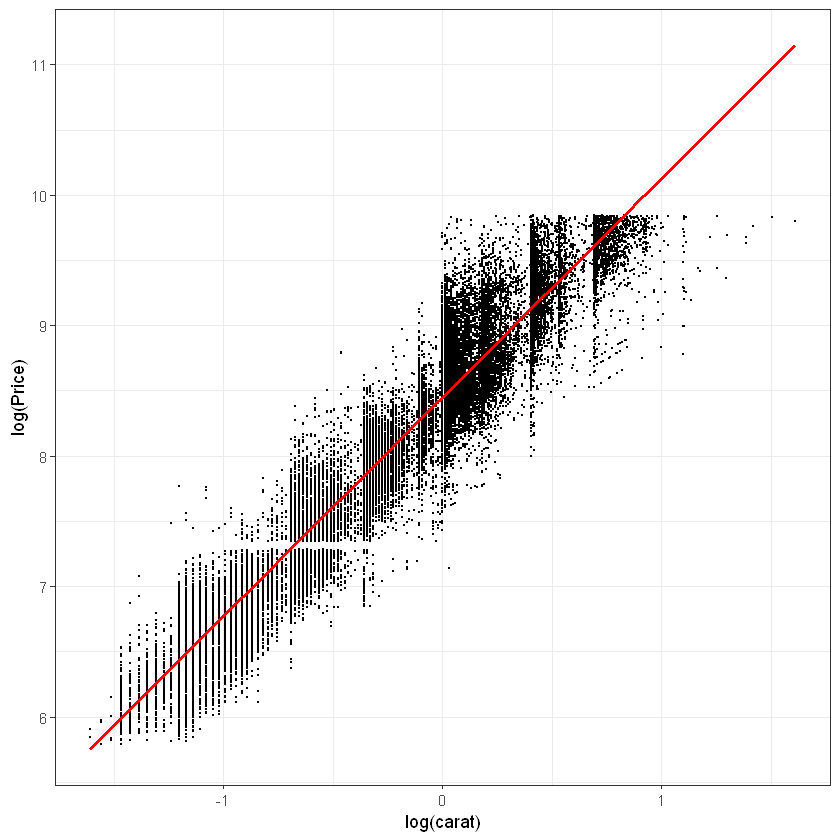

In [16]:
#scatterplot of log(price) and log(carat)
ggplot(data=diamonds,aes(x=log(carat), y = log(price)))+
# add scatter plot
	geom_point(size=.1)+
# add trendline, change the color of the trendline to red, default is blue
	geom_smooth(method=lm, color = "red")+
	xlab("log(carat)")+
	ylab("log(Price)")+
#	coord_cartesian(ylim=c(0,40000))+
	theme_bw()


In [17]:
# this scatter plot shows that the data is linear in nature

In [18]:
# run the regression for log(price) vs log(weight)
lmMod <- lm(log(price) ~ log(carat),data = diamonds)
summary(lmMod)



Call:
lm(formula = log(price) ~ log(carat), data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50833 -0.16951 -0.00591  0.16637  1.33793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.448661   0.001365  6190.9   <2e-16 ***
log(carat)  1.675817   0.001934   866.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2627 on 53938 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.933 
F-statistic: 7.51e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


In [19]:
# the intercept is positive in this case

In [20]:
# price prediction for 0.2 carat diamond
#log(price) = 8.449 + 1.676*log(0.2)=5.752
#price = exp(log(price))
price = exp(5.752) 
# 314.82


In [22]:
print('Predicted price of a 0.2 carat diamond is')
print (price)

[1] "Predicted price of a 0.2 carat diamond is"
[1] 314.8197


In [23]:
# This is a positive value and is as expected in real life